### dataset taken from https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# step 1: data preprocessing and analysis

# i .preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
itemno = 3#select item (1 to 50)
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
# for example, to get the sum each day:
# df.groupby(df['date'].dt.date).sum()
train, test = np.split(dffiltered, [int(.8*len(dffiltered))])#first ko ma .8 jancha
df=train
print(df.head())
print(df.values[2])

            date  item  sales
36520 2013-01-01     3     15
36521 2013-01-02     3     30
36522 2013-01-03     3     14
36523 2013-01-04     3     10
36524 2013-01-05     3     23
            item  sales
date                   
2013-01-01    30    172
2013-01-02    30    213
2013-01-03    30    193
2013-01-04    30    218
2013-01-05    30    217
            sales
date             
2013-01-01    172
2013-01-02    213
2013-01-03    193
2013-01-04    218
2013-01-05    217
[193]


# ii. analysis

In [2]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06   1259
2013-01-13   1472
2013-01-20   1452
2013-01-27   1443
2013-02-03   1485
            sales
date             
2013-01-31   6345
2013-02-28   6529
2013-03-31   8546
2013-04-30   9704
2013-05-31  10755
            sales
date             
2016-12-26    245
2016-12-27    271
2016-12-28    274
2016-12-29    288
2016-12-30    327


c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

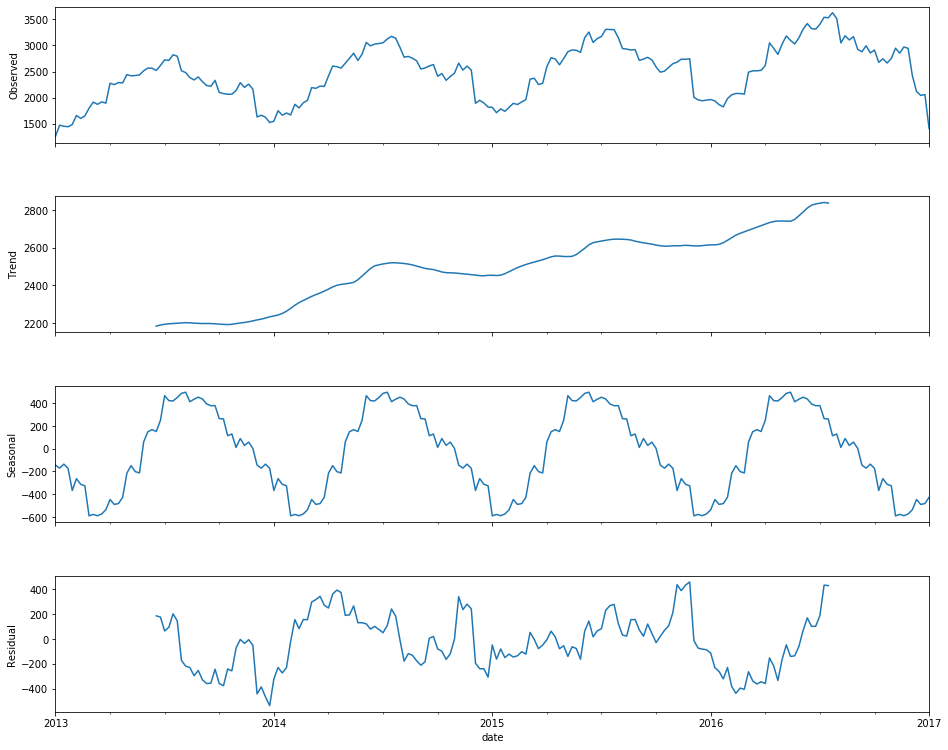

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [5]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

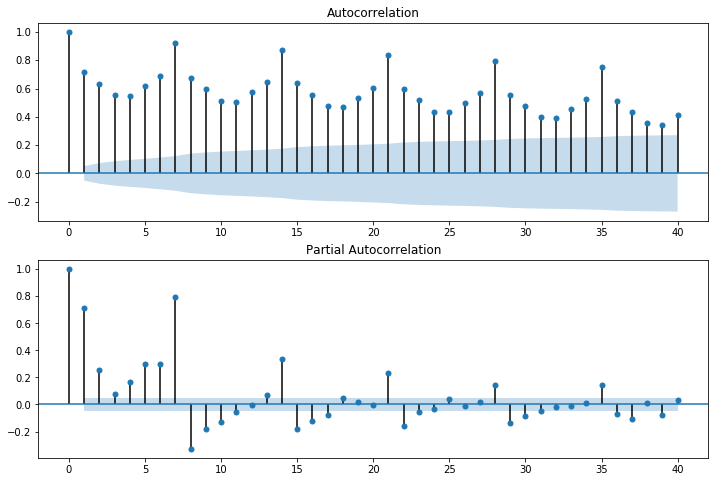

In [6]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

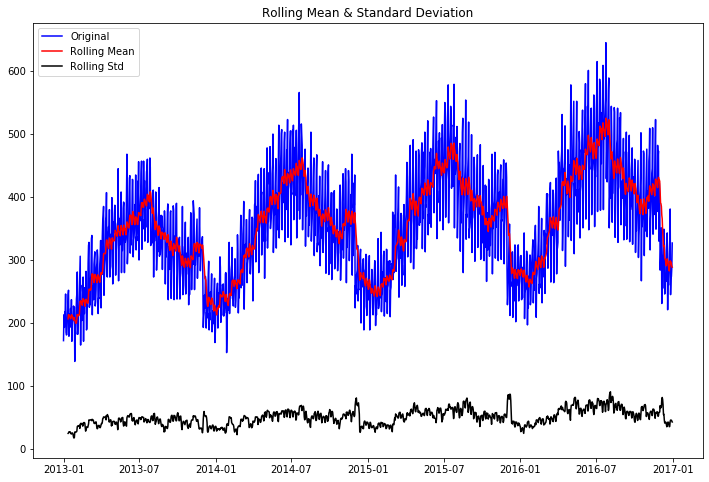

Results of Dickey-Fuller Test:
p-value = 0.1295. The series is likely non-stationary.
Test Statistic                   -2.444702
p-value                           0.129515
#Lags Used                       20.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [7]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [8]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

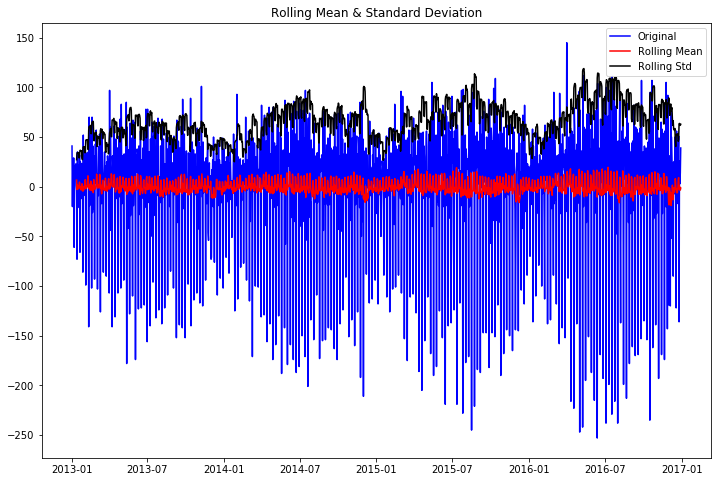

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.525124e+00
p-value                        2.992078e-16
#Lags Used                     2.000000e+01
Number of Observations Used    1.438000e+03
Critical Value (1%)           -3.434906e+00
Critical Value (5%)           -2.863552e+00
Critical Value (10%)          -2.567841e+00
dtype: float64


In [9]:
test_stationarity(first_diff, window = 12)

In [10]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02   41.0
1    2013-01-03  -20.0
2    2013-01-04   25.0
3    2013-01-05   -1.0
4    2013-01-06   29.0
5    2013-01-07  -61.0
6    2013-01-08   -4.0
7    2013-01-09    1.0
8    2013-01-10   20.0
9    2013-01-11   23.0
10   2013-01-12   20.0
11   2013-01-13    7.0
12   2013-01-14  -73.0
13   2013-01-15   35.0
14   2013-01-16  -21.0
15   2013-01-17    8.0
16   2013-01-18   22.0
17   2013-01-19  -18.0
18   2013-01-20   32.0
19   2013-01-21  -66.0
20   2013-01-22   25.0
21   2013-01-23    9.0
22   2013-01-24   -1.0
23   2013-01-25   23.0
24   2013-01-26  -12.0
25   2013-01-27   10.0
26   2013-01-28  -86.0
27   2013-01-29   52.0
28   2013-01-30   -9.0
29   2013-01-31   25.0
...         ...    ...
1429 2016-12-01 -119.0
1430 2016-12-02   19.0
1431 2016-12-03   31.0
1432 2016-12-04   17.0
1433 2016-12-05 -120.0
1434 2016-12-06   76.0
1435 2016-12-07  -52.0
1436 2016-12-08   50.0
1437 2016-12-09   30.0
1438 2016-12-10   1

# Step 4: Plot ACF and PACF plots

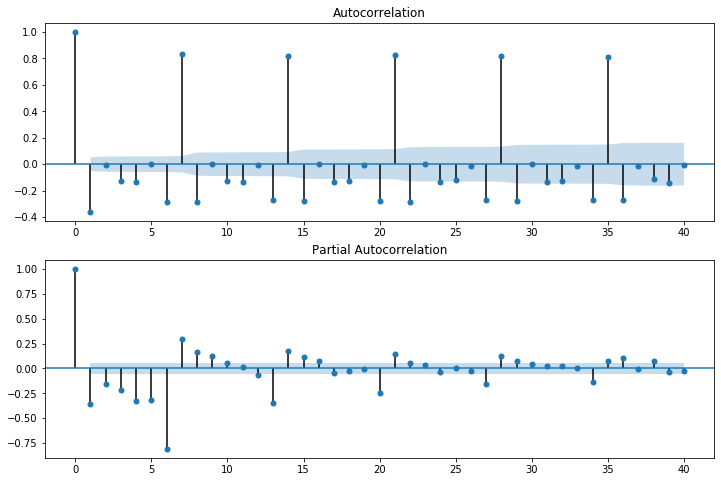

In [11]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6: Fit the model

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


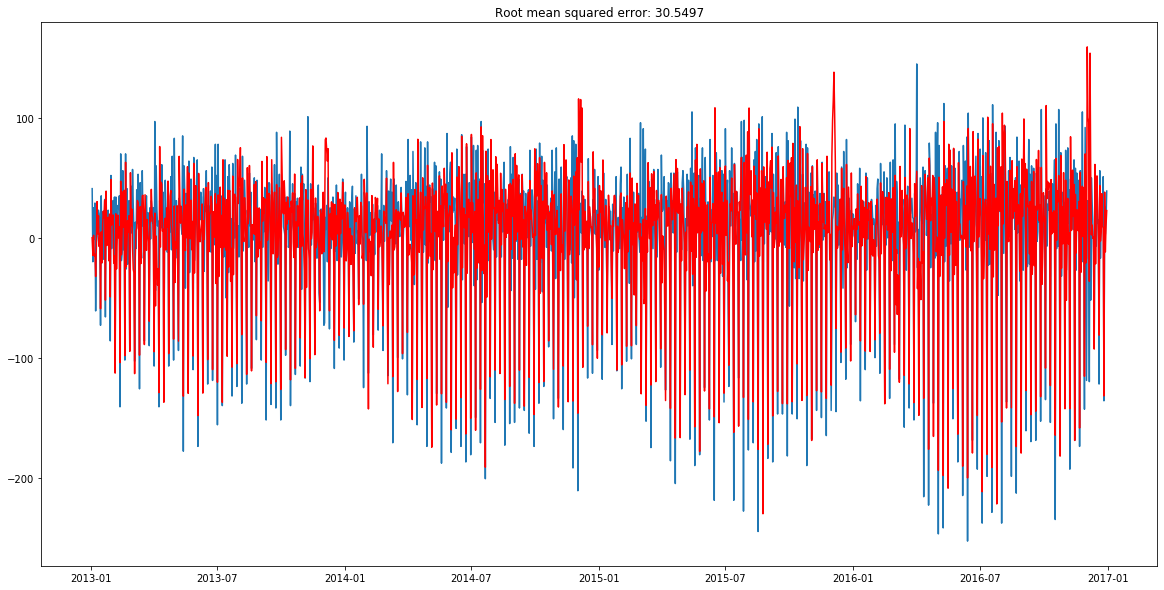

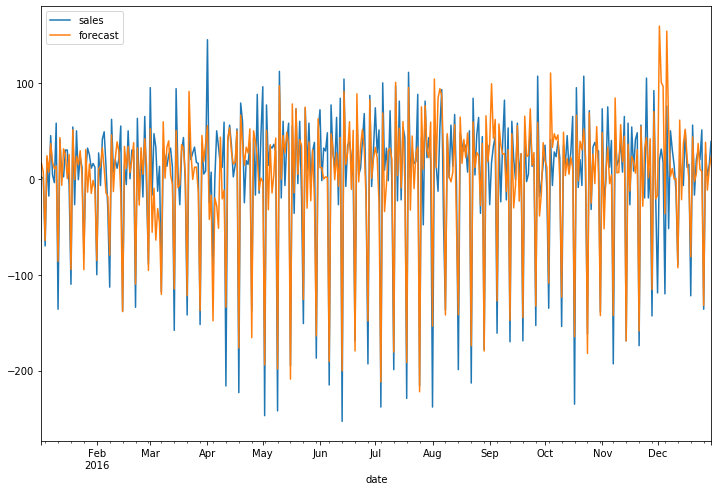

In [12]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

# Step 7: Test the model

# i. Testing the fitted values in original scale

## i. a) converting fitted values to original scale

In [13]:
#Let "xd" denote the differenced data and "x" denote the original data. 
#Then xd[n]=x[n+1]-x[n]. Therefore, x[n+1]=x[n]+xd[n]. 
#If you add the first element of first difference forecast to the real data with the same indice, then you will get the next real data forecast.
#here used xd[n] = x[n] -x[n+1] so first becomes nan
fittedOrgScale= df.copy()#data frame has values in sales
xd= results_ARIMA.fittedvalues# series has values in values
print(type(results_ARIMA.fittedvalues))

xd=pd.concat([pd.Series([0]),xd])
end=fittedOrgScale.shape[0]#for for loop in next cell
print(fittedOrgScale.values)


<class 'pandas.core.series.Series'>
[[172]
 [213]
 [193]
 ...
 [274]
 [288]
 [327]]


In [14]:
print(fittedOrgScale.values[0])
#run above to run this 
j=0
for i in fittedOrgScale.index:
    
    fittedOrgScale.values[j] = fittedOrgScale.values[j+1] + xd.values[j]
    print('adding',j,fittedOrgScale.values[j+1],'+',xd.values[j],fittedOrgScale.values[j])
    j+=1
    if j+1 ==end:
        break



[172]
adding 0 [213] + 0.0 [213]
adding 1 [193] + 0.06727993307701041 [193]
adding 2 [218] + -14.614912509505215 [203]
adding 3 [217] + 2.068829271582892 [219]
adding 4 [246] + -15.03954767976898 [230]
adding 5 [185] + -13.697614885739895 [171]
adding 6 [181] + -32.29296679888045 [148]
adding 7 [182] + -7.284567399889564 [174]
adding 8 [202] + 30.16462614977119 [232]
adding 9 [225] + 3.176572375302534 [228]
adding 10 [245] + 18.371251561359728 [263]
adding 11 [252] + -7.223737451855584 [244]
adding 12 [179] + 3.6310345422707364 [182]
adding 13 [214] + -59.1634287640832 [154]
adding 14 [193] + 4.891034049267169 [197]
adding 15 [201] + -20.729453951535202 [180]
adding 16 [223] + 11.061873823717507 [234]
adding 17 [205] + 22.168056400708792 [227]
adding 18 [237] + 16.63915408913006 [253]
adding 19 [171] + 31.20966443990204 [202]
adding 20 [196] + -51.969526014695106 [144]
adding 21 [205] + 38.939830401405814 [243]
adding 22 [204] + -6.419326256004524 [197]
adding 23 [227] + 0.407150053277

adding 341 [192] + -22.283037796873312 [169]
adding 342 [217] + -60.96370969755755 [156]
adding 343 [208] + 19.958798110474135 [227]
adding 344 [224] + 1.0691489496265625 [225]
adding 345 [245] + 29.931975873465532 [274]
adding 346 [279] + -1.5949405543527675 [277]
adding 347 [298] + 28.38883776467869 [326]
adding 348 [189] + -14.169861390272857 [174]
adding 349 [216] + -85.5744635565096 [130]
adding 350 [205] + 27.763241390285454 [232]
adding 351 [249] + -7.038259755941814 [241]
adding 352 [230] + 18.158186912663812 [248]
adding 353 [257] + 3.14673537285746 [260]
adding 354 [278] + 37.771107814399194 [315]
adding 355 [186] + 26.996279469156494 [212]
adding 356 [197] + -81.40327398808975 [115]
adding 357 [219] + 32.229319450738274 [251]
adding 358 [203] + 3.5249553153751876 [206]
adding 359 [199] + 29.22577738034051 [228]
adding 360 [248] + 15.72262718719644 [263]
adding 361 [271] + 46.367791159212246 [317]
adding 362 [169] + 19.016076501822656 [188]
adding 363 [188] + -75.282871096308

adding 691 [276] + 18.987937983732337 [294]
adding 692 [357] + -136.19392144407178 [220]
adding 693 [307] + 51.45078152020466 [358]
adding 694 [344] + 10.515181159259598 [354]
adding 695 [422] + 30.233488486108826 [452]
adding 696 [387] + 54.94527002676096 [441]
adding 697 [435] + -34.93848443867633 [400]
adding 698 [224] + 66.7182150870101 [290]
adding 699 [260] + -146.30820748599703 [113]
adding 700 [246] + 115.86370234709125 [361]
adding 701 [275] + 23.354180330518005 [298]
adding 702 [280] + 80.50465076684696 [360]
adding 703 [284] + 115.31661731143069 [399]
adding 704 [323] + 63.008731287457444 [386]
adding 705 [235] + 108.26429524897881 [343]
adding 706 [254] + -108.0900110772808 [145]
adding 707 [253] + 34.9006546256273 [287]
adding 708 [285] + -10.048130781680797 [274]
adding 709 [297] + 22.11142354283062 [319]
adding 710 [308] + -2.4398843844002034 [305]
adding 711 [317] + -8.368842526735559 [308]
adding 712 [200] + 13.918434660385 [213]
adding 713 [266] + -73.77589559754608 [

adding 1060 [454] + 30.295331029416683 [484]
adding 1061 [431] + -18.445249162679037 [412]
adding 1062 [287] + 2.8098916479959968 [289]
adding 1063 [229] + -122.96307022876069 [106]
adding 1064 [244] + 67.42150465854834 [311]
adding 1065 [265] + 97.71858345071598 [362]
adding 1066 [299] + 114.01242892543078 [413]
adding 1067 [325] + 138.12627636158228 [463]
adding 1068 [357] + 103.29731918608078 [460]
adding 1069 [212] + 62.634812832859645 [274]
adding 1070 [266] + -75.62773165762023 [190]
adding 1071 [258] + 9.703613034157641 [267]
adding 1072 [302] + -8.621743591777886 [293]
adding 1073 [296] + 8.544189687154258 [304]
adding 1074 [311] + 6.760624895472315 [317]
adding 1075 [313] + 21.260860765048324 [334]
adding 1076 [209] + 32.204072951669936 [241]
adding 1077 [268] + -95.40506898180014 [172]
adding 1078 [277] + 57.96340082900642 [334]
adding 1079 [235] + -10.092383319379557 [224]
adding 1080 [307] + 26.100598159634103 [333]
adding 1081 [324] + 41.28525176262102 [365]
adding 1082 [3

In [15]:
#convert to cumulative sum
#1st make data frame as series
#series bata cumsum
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print ('prediction arima diff',type(predictions_ARIMA_diff),predictions_ARIMA_diff.head())
#to cumsum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print ('cumsum',predictions_ARIMA_diff_cumsum.head())



prediction arima diff <class 'pandas.core.series.Series'> date
2013-01-02     0.067280
2013-01-03   -14.614913
2013-01-04     2.068829
2013-01-05   -15.039548
2013-01-06   -13.697615
dtype: float64
cumsum date
2013-01-02     0.067280
2013-01-03   -14.547633
2013-01-04   -12.478803
2013-01-05   -27.518351
2013-01-06   -41.215966
dtype: float64


In [18]:
# df1= df.drop(df.index[0])
#dropping first value of original as fitted is from second index
df1=df.drop(df.index[0])
x1=fittedOrgScale.copy()
len(x1)


1460

# rmse of the fitted line for training data

In [19]:
error = df.sales - fittedOrgScale.values.reshape(fittedOrgScale.values.shape[0])
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE = meanError**0.5
highestScale = np.amax(dffiltered.values)
print('The Root Mean Squared Error is',RMSE,'The range of data is 0 to ',highestScale)

The Root Mean Squared Error is 76.95644560755093 The range of data is 0 to  662


### i.b) plot original vs fitted values in original scale

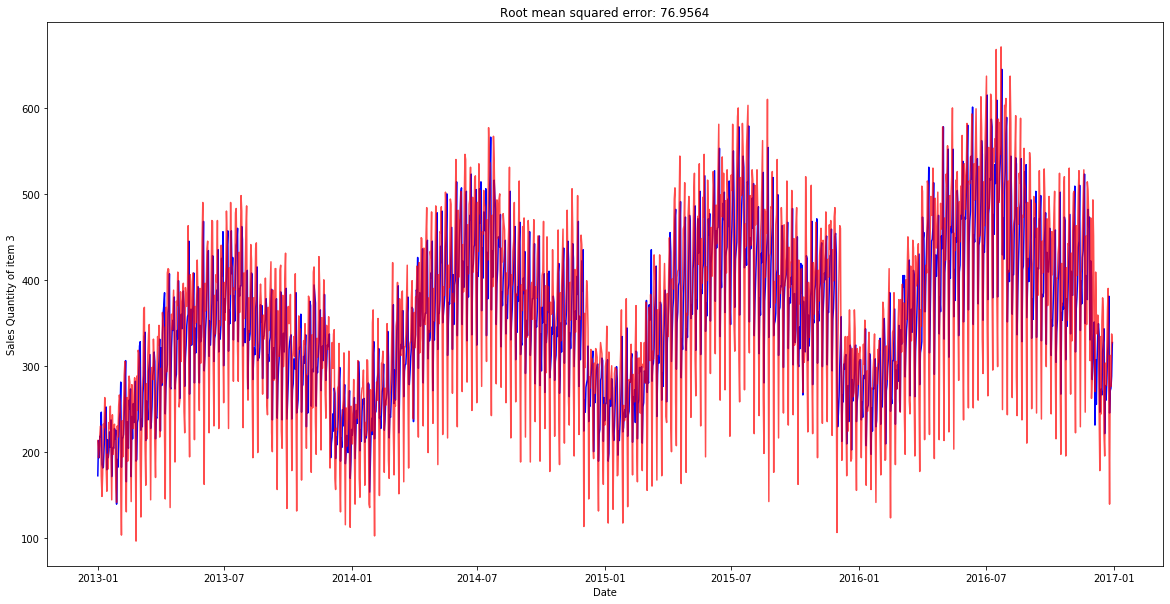

1460 1460


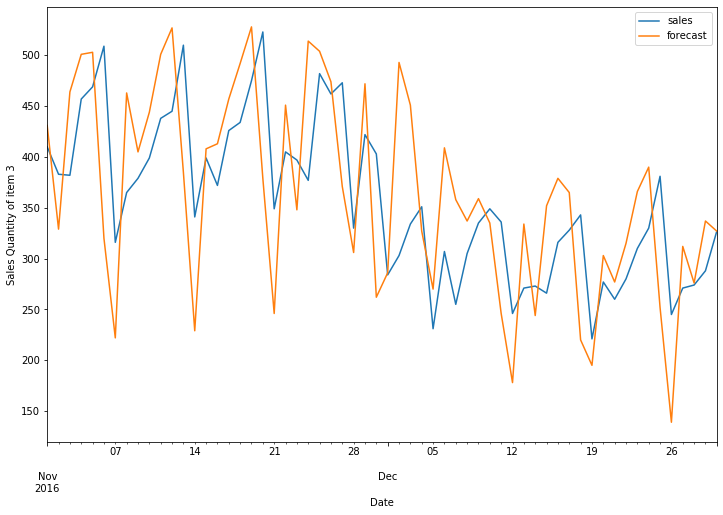

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df.sales,color='blue')
plt.plot(x1,'r-', alpha=0.7)
plt.title('Root mean squared error: %.4f'% RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()
print(len(df),len(x1))
df['forecast'] = x1.values
start_index =1400
end_index =start_index+365

df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

## ii. Testing the predicted values

In [21]:
fitLen = len(results_ARIMA.fittedvalues)

lastTwo= len(results_ARIMA.fittedvalues)-2*365

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


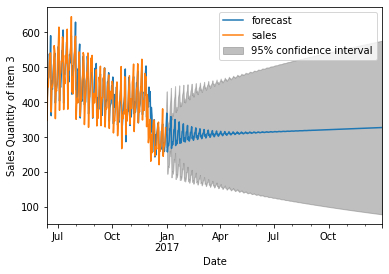

In [22]:
results_ARIMA.plot_predict(fitLen-200,fitLen+365)#start rows + end rows of forecast rows 18260+40
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2016-12-31    330.896753
2017-01-01    368.688473
2017-01-02    257.513510
2017-01-03    279.086383
2017-01-04    275.816029
Freq: D, dtype: float64


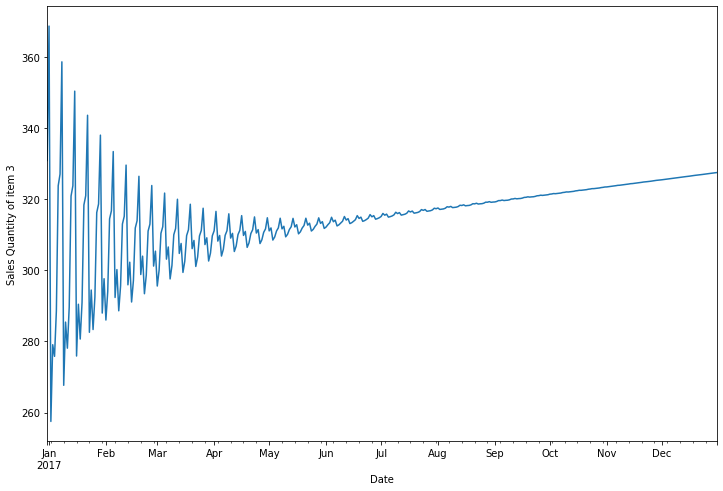

In [23]:
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='levels', dynamic=False) # this works
print(yearPrediction.head())

yearPrediction.plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

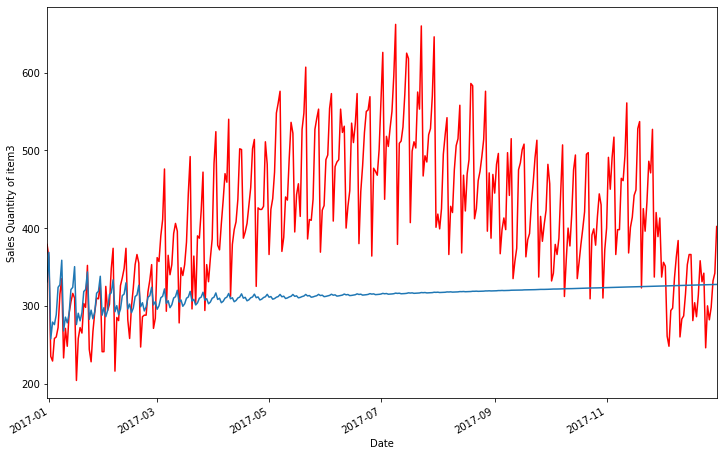

In [24]:
plt.plot(test.sales,color='red',)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item"+str(itemno))
yearPrediction.plot(figsize=(12, 8))
plt.show()

In [25]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2016-12-31    308.896753
2017-01-01    344.791720
2017-01-02    195.825037
2017-01-03    258.572873
2017-01-04    254.729646
2017-01-05    252.787944
2017-01-06    320.178968
2017-01-07    292.288247
2017-01-08    316.563668
2017-01-09    252.036966
2017-01-10    224.772766
2017-01-11    240.671174
2017-01-12    263.556578
2017-01-13    285.224292
2017-01-14    286.884148
2017-01-15    340.611603
2017-01-16    232.515517
2017-01-17    211.560616
2017-01-18    241.212159
2017-01-19    234.339216
2017-01-20    301.359706
2017-01-21    275.613631
2017-01-22    318.619545
2017-01-23    246.968121
2017-01-24    240.878560
2017-01-25    224.894706
2017-01-26    277.163809
2017-01-27    316.721237
2017-01-28    306.426294
2017-01-29    339.357443
                 ...    
2017-12-02    303.070581
2017-12-03    334.083432
2017-12-04    351.068308
2017-12-05    231.083172
2017-12-06    307.047839
2017-12-07    255.066497
2017-12-08    305.053721
2017-12-09    335.069741
2017-12-10    349.080471


c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [26]:
#out sample 
error = orgscale.values-test.values.reshape(test.values.shape[0])
highestScale = np.amax(test.values)
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE2 = meanError**0.5
print(RMSE2,meanAbsoluteError,highestScale)


72.72932450506298 56.75996873772355 662


The root mean squared error is  72.72932450506298


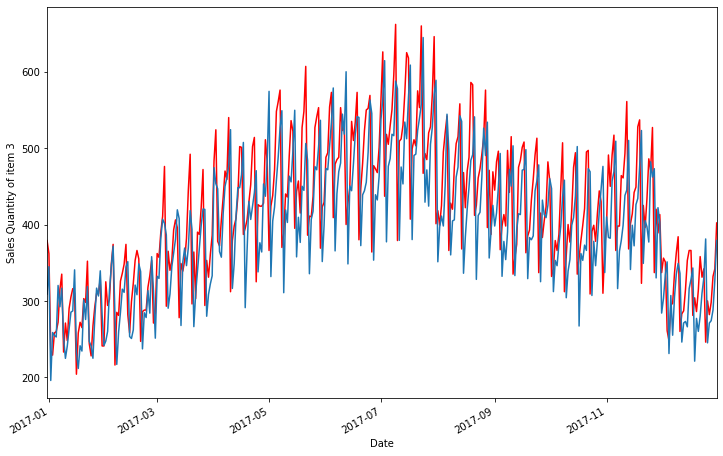

In [33]:
print("The root mean squared error is ",RMSE2)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.plot(test.sales,color='red',)
orgscale.plot(figsize=(12, 8))
plt.show()

In [28]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [29]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  14140.177237597061


# EXPORTING AS JSON

In [30]:
dft= pd.DataFrame({'date':orgscale.index, 'sales quantity':orgscale.values})

dft['date'] = pd.to_datetime(dft['date'])#convert to date time object
dft['item'] = itemno
print(dft.tail())

          date  sales quantity  item
361 2017-12-27      271.056479     3
362 2017-12-28      274.067093     3
363 2017-12-29      288.058041     3
364 2017-12-30      327.068145     3
365 2017-12-31      379.074317     3


In [31]:
export=dft.to_json(orient='records',date_format='iso')

In [32]:
print(export)
dft.to_json(path_or_buf=r'C:\Users\Acer\Desktop\minor\env\src\predicted{}.json'.format(itemno),orient='records',date_format='iso')

[{"date":"2016-12-31T00:00:00.000Z","sales quantity":308.8967529687,"item":3},{"date":"2017-01-01T00:00:00.000Z","sales quantity":344.7917196836,"item":3},{"date":"2017-01-02T00:00:00.000Z","sales quantity":195.8250372597,"item":3},{"date":"2017-01-03T00:00:00.000Z","sales quantity":258.572872887,"item":3},{"date":"2017-01-04T00:00:00.000Z","sales quantity":254.7296462999,"item":3},{"date":"2017-01-05T00:00:00.000Z","sales quantity":252.787944024,"item":3},{"date":"2017-01-06T00:00:00.000Z","sales quantity":320.1789681156,"item":3},{"date":"2017-01-07T00:00:00.000Z","sales quantity":292.2882471563,"item":3},{"date":"2017-01-08T00:00:00.000Z","sales quantity":316.5636675074,"item":3},{"date":"2017-01-09T00:00:00.000Z","sales quantity":252.0369655353,"item":3},{"date":"2017-01-10T00:00:00.000Z","sales quantity":224.772765652,"item":3},{"date":"2017-01-11T00:00:00.000Z","sales quantity":240.6711740178,"item":3},{"date":"2017-01-12T00:00:00.000Z","sales quantity":263.5565777444,"item":3},{